## User Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## User Details

In [2]:
user_details = pd.read_csv('user_purchase_data.csv')

In [3]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN


In [4]:
user_details.shape

(1000, 3)

asuming the user_uid that have date_of_first_purhcase are paid users, created a boolean varible purchased

In [5]:
user_details[['paid_user']]=user_details[['date_of_first_purhcase']].notnull()

In [6]:
user_details.paid_user.value_counts()

True     576
False    424
Name: paid_user, dtype: int64

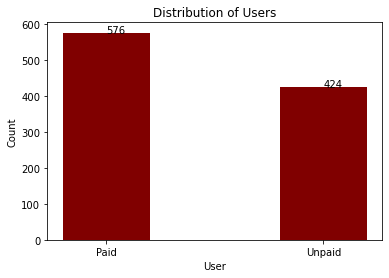

In [7]:
user = ['Paid','Unpaid']
plt.bar(user,user_details.paid_user.value_counts(),color = 'maroon',width = 0.4)
plt.title("Distribution of Users")
plt.xlabel("User")
plt.ylabel("Count")

for index, value in enumerate(user_details.paid_user.value_counts()):
    plt.text(index, value, str(value))

plt.title
plt.show()

There are 576 paid users and 424 unpaid users

In [8]:
# convert object to date
user_details['date_joined'] = pd.to_datetime(user_details.date_joined)
user_details['date_of_first_purhcase']=pd.to_datetime(user_details.date_of_first_purhcase)
user_details['date_diff'] = abs(user_details.date_of_first_purhcase - user_details.date_joined)

In [9]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff
0,6,2021-06-04,2021-06-04,True,0 days
1,608,2021-06-04,NaT,False,NaT
2,635,2021-06-04,NaT,False,NaT
3,745,2021-06-04,NaT,False,NaT
4,1506,2021-06-04,NaT,False,NaT


In [10]:
def f(row):
    val = int(re.findall('\d+ ',str(row['date_diff']))[0].strip())    
    return val

In [11]:
user_details['ddiff'] = user_details[user_details.paid_user==True].apply(f,axis =1) 

In [12]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff
0,6,2021-06-04,2021-06-04,True,0 days,0.0
1,608,2021-06-04,NaT,False,NaT,NaN
2,635,2021-06-04,NaT,False,NaT,NaN
3,745,2021-06-04,NaT,False,NaT,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN


In [13]:
def w(row):
    if row['ddiff']>=0 and row['ddiff']<=7:
        val = 'Week 1'
    elif row['ddiff']>=8 and row['ddiff']<=14:
        val = 'Week 2'
    elif row['ddiff']>=15 and row['ddiff']<=21:
        val = 'Week 3'
    elif row['ddiff']>=22 and row['ddiff']<=28:
        val = 'Week 4'
    else:val = 'After a Month'
    return val

In [14]:
user_details['paid_user_from'] = user_details[user_details.paid_user==True].apply(w,axis = 1)

In [15]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [16]:
user_details.shape

(1000, 7)

In [17]:
paid_user_in_weeks = user_details.paid_user_from.value_counts()

In [18]:
paid_user_in_weeks

Week 1           490
Week 2            38
Week 3            24
Week 4            13
After a Month     11
Name: paid_user_from, dtype: int64

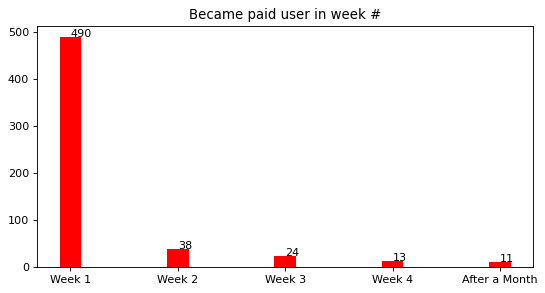

In [19]:
plt.figure(figsize=(8,4), dpi=80)
plt.bar(paid_user_in_weeks.index,paid_user_in_weeks.values,color = 'red',width = 0.2)
plt.title("Became paid user in week #")

for index, value in enumerate(paid_user_in_weeks):
    plt.text(index, value, str(value))

plt.title
plt.show()

## Course Details

In [20]:
course_details = pd.read_csv('track_subscription_data.csv')

In [21]:
course_details.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [22]:
len(course_details.user_id.unique())

962

identified 962 unique values for user_id

In [23]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [24]:
user=user_details.rename(columns = {'user_uid':'user_id'})

In [25]:
user.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1
1,608,2021-06-04,NaT,False,NaT,NaN,NaN
2,635,2021-06-04,NaT,False,NaT,NaN,NaN
3,745,2021-06-04,NaT,False,NaT,NaN,NaN
4,1506,2021-06-04,NaT,False,NaT,NaN,NaN


In [26]:
user_det = pd.merge(user,course_details,how = 'left',on = 'user_id',indicator=True)

In [27]:
user_det.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,_merge
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,kerala-psc,2021-06-04,both
1,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,KTET,2021-06-04,both
2,608,2021-06-04,NaT,False,NaT,NaN,NaN,spoken-english,2021-06-04,both
3,608,2021-06-04,NaT,False,NaT,NaN,NaN,APPSC,2021-06-04,both
4,608,2021-06-04,NaT,False,NaT,NaN,NaN,Eng_With_Awal,2021-06-04,both


In [28]:
user_det = user_det.rename(columns={'_merge':'Source'})

In [29]:
user_det.head()

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,Source
0,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,kerala-psc,2021-06-04,both
1,6,2021-06-04,2021-06-04,True,0 days,0.0,Week 1,KTET,2021-06-04,both
2,608,2021-06-04,NaT,False,NaT,NaN,NaN,spoken-english,2021-06-04,both
3,608,2021-06-04,NaT,False,NaT,NaN,NaN,APPSC,2021-06-04,both
4,608,2021-06-04,NaT,False,NaT,NaN,NaN,Eng_With_Awal,2021-06-04,both


In [30]:
user_det.Source.value_counts()

both          1578
left_only       38
right_only       0
Name: Source, dtype: int64

In [31]:
user_det[user_det.Source=='left_only'].shape

(38, 10)

In [32]:
user_det[user_det.Source=='left_only']

,user_id,date_joined,date_of_first_purhcase,paid_user,date_diff,ddiff,paid_user_from,track_slug,subscription_date,Source
57,13061,2021-06-06,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
110,24366,2021-06-07,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
181,36042,2021-06-09,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
243,53892,2021-06-11,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
350,85028,2021-06-15,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
488,120235,2021-06-19,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
507,125187,2021-06-20,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
533,134461,2021-06-21,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
635,146428,2021-06-23,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only
683,156464,2021-06-25,NaT,False,NaT,NaN,NaN,NaN,NaN,left_only


course details are missing for 38 unpaid users

In [33]:
user_det1 = user_det[user_det.Source == 'both']

In [34]:
user_det1.shape

(1578, 10)

In [38]:
len(user_det1[user_det1.paid_user==True].user_id.unique())

576

course details for 576 paid users are available

In [39]:
len(user_det1[user_det1.paid_user==False].user_id.unique())

386

course details for 386 paid users are available

In [42]:
course = user_det1.track_slug.value_counts()

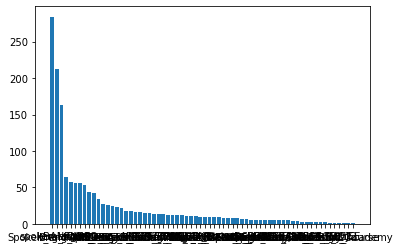

In [67]:
plt.bar(course.index,course.values)
plt.show()

In [59]:
list(enumerate(course))

[(0, 284),
 (1, 213),
 (2, 163),
 (3, 64),
 (4, 57),
 (5, 56),
 (6, 56),
 (7, 53),
 (8, 44),
 (9, 43),
 (10, 34),
 (11, 27),
 (12, 26),
 (13, 24),
 (14, 23),
 (15, 22),
 (16, 17),
 (17, 17),
 (18, 16),
 (19, 16),
 (20, 15),
 (21, 15),
 (22, 14),
 (23, 14),
 (24, 13),
 (25, 12),
 (26, 12),
 (27, 12),
 (28, 12),
 (29, 11),
 (30, 11),
 (31, 11),
 (32, 10),
 (33, 10),
 (34, 10),
 (35, 9),
 (36, 9),
 (37, 8),
 (38, 8),
 (39, 8),
 (40, 8),
 (41, 7),
 (42, 7),
 (43, 6),
 (44, 6),
 (45, 5),
 (46, 5),
 (47, 5),
 (48, 5),
 (49, 5),
 (50, 5),
 (51, 5),
 (52, 4),
 (53, 4),
 (54, 3),
 (55, 3),
 (56, 3),
 (57, 3),
 (58, 2),
 (59, 2),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1)]